In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from matplotlib import pyplot as plt

2022-11-01 09:26:32.979588: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
sns.set_theme()

## Utils

In [3]:
 # epoch       auc      loss   val_auc  val_loss

In [4]:
def plot_loss(path):
    for fold, history_fold in enumerate(tf.io.gfile.glob(f"{path}/*.csv")):
        df = pd.read_csv(history_fold)
        sns.lineplot(data=df, x="epoch", y="loss", label=f"Fold {fold+1}", alpha=0.6)
        
def plot_val_loss(path):
    for fold, history_fold in enumerate(tf.io.gfile.glob(f"{path}/*.csv")):
        df = pd.read_csv(history_fold)
        sns.lineplot(data=df, x="epoch", y="val_loss", label=f"Fold {fold+1}", alpha=0.6)
        
        best = df.val_loss.argmin()
        sns.scatterplot(x=[df.epoch[best]], y=[df.val_loss[best]], marker="X", s=200)
        
def plot_auc(path):
    for fold, history_fold in enumerate(tf.io.gfile.glob(f"{path}/*.csv")):
        df = pd.read_csv(history_fold)
        sns.lineplot(data=df, x="epoch", y=df.iloc[:, 1], label=f"Fold {fold+1}", alpha=0.6)
        
def plot_val_auc(path):
    for fold, history_fold in enumerate(tf.io.gfile.glob(f"{path}/*.csv")):
        df = pd.read_csv(history_fold)
        sns.lineplot(data=df, x="epoch", y=df.iloc[:, 3], label=f"Fold {fold+1}", alpha=0.6)        
        
        best = df.val_loss.argmin()
        sns.scatterplot(x=[df.epoch[best]], y=[df.iloc[:, 3][best]], marker="X", s=200)

In [6]:
def plot_model_learning(name, path):
    fig = plt.figure(figsize=(16, 12))
    fig.suptitle(name)
    
    plt.subplot(221)
    plot_loss(path)
    plt.title("Training Loss")
    plt.legend();

    plt.subplot(222)
    plot_val_loss(path)
    plt.title("Validation Loss")
    plt.legend();

    plt.subplot(223)
    plot_auc(path)
    plt.title("Training AUC")
    plt.legend();

    plt.subplot(224)
    plot_val_auc(path)
    plt.title("Validation AUC")
    plt.legend();

## Run

### EXP1: DenseNet121_None

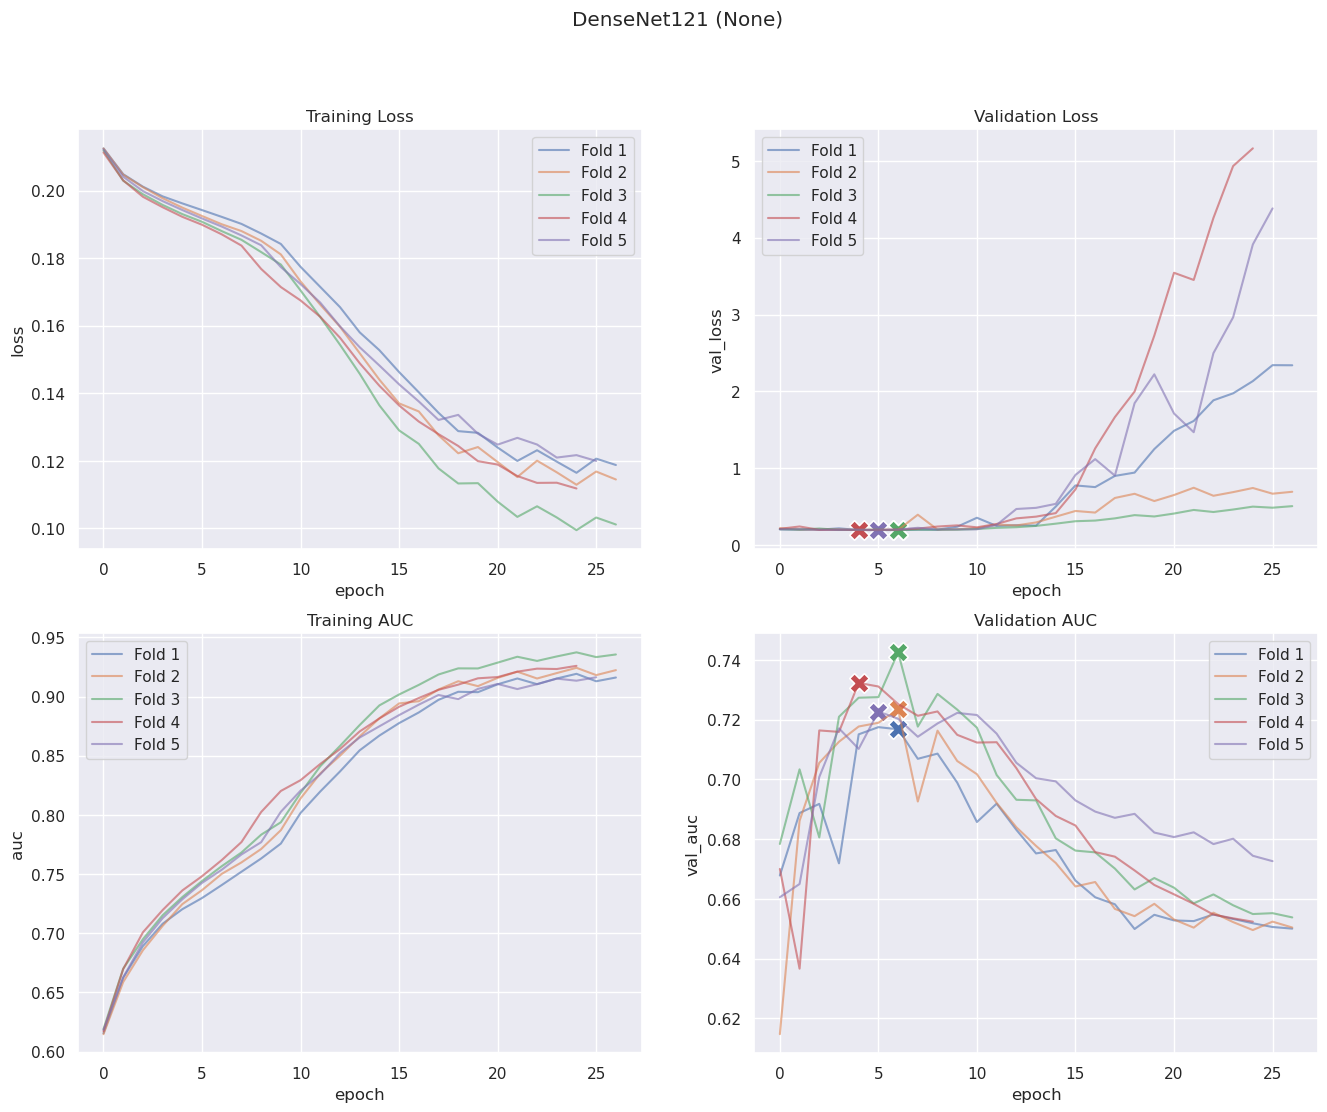

In [7]:
name = "DenseNet121 (None)"
path = "results/history/DenseNet121_noDropout_None"
plot_model_learning(name, path)

### EXP2: DenseNet121_Imagenet

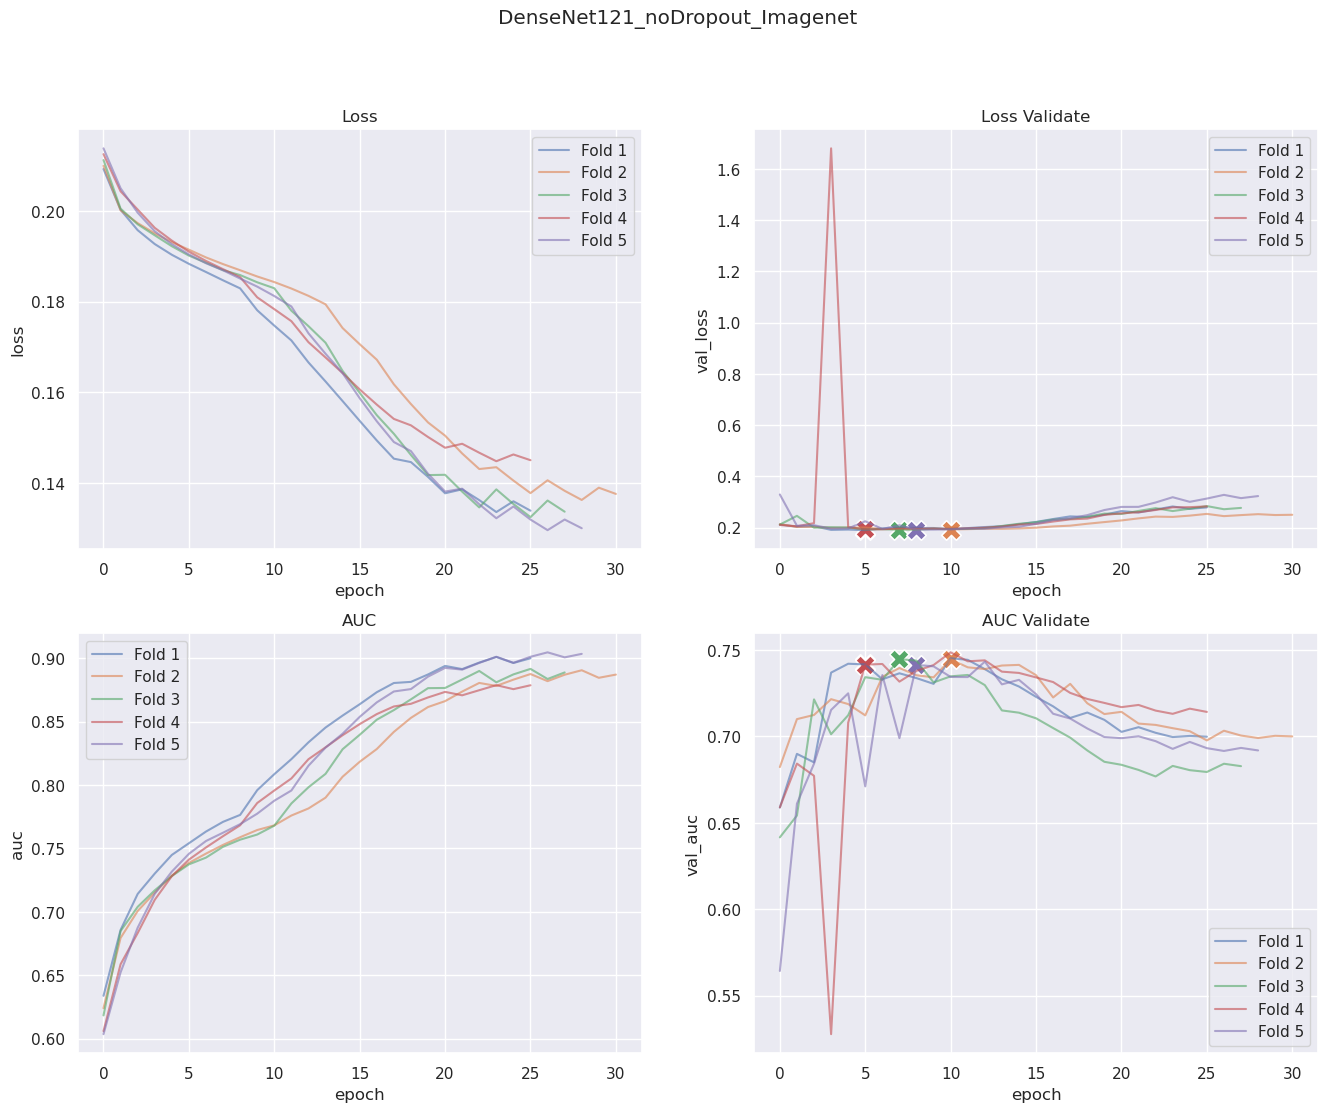

In [10]:
name = "DenseNet121_noDropout_Imagenet"
path = "results/history/DenseNet121_noDropout_imagenet"
plot_model_learning(name, path)

### EXP3:EfficientNetB0_None

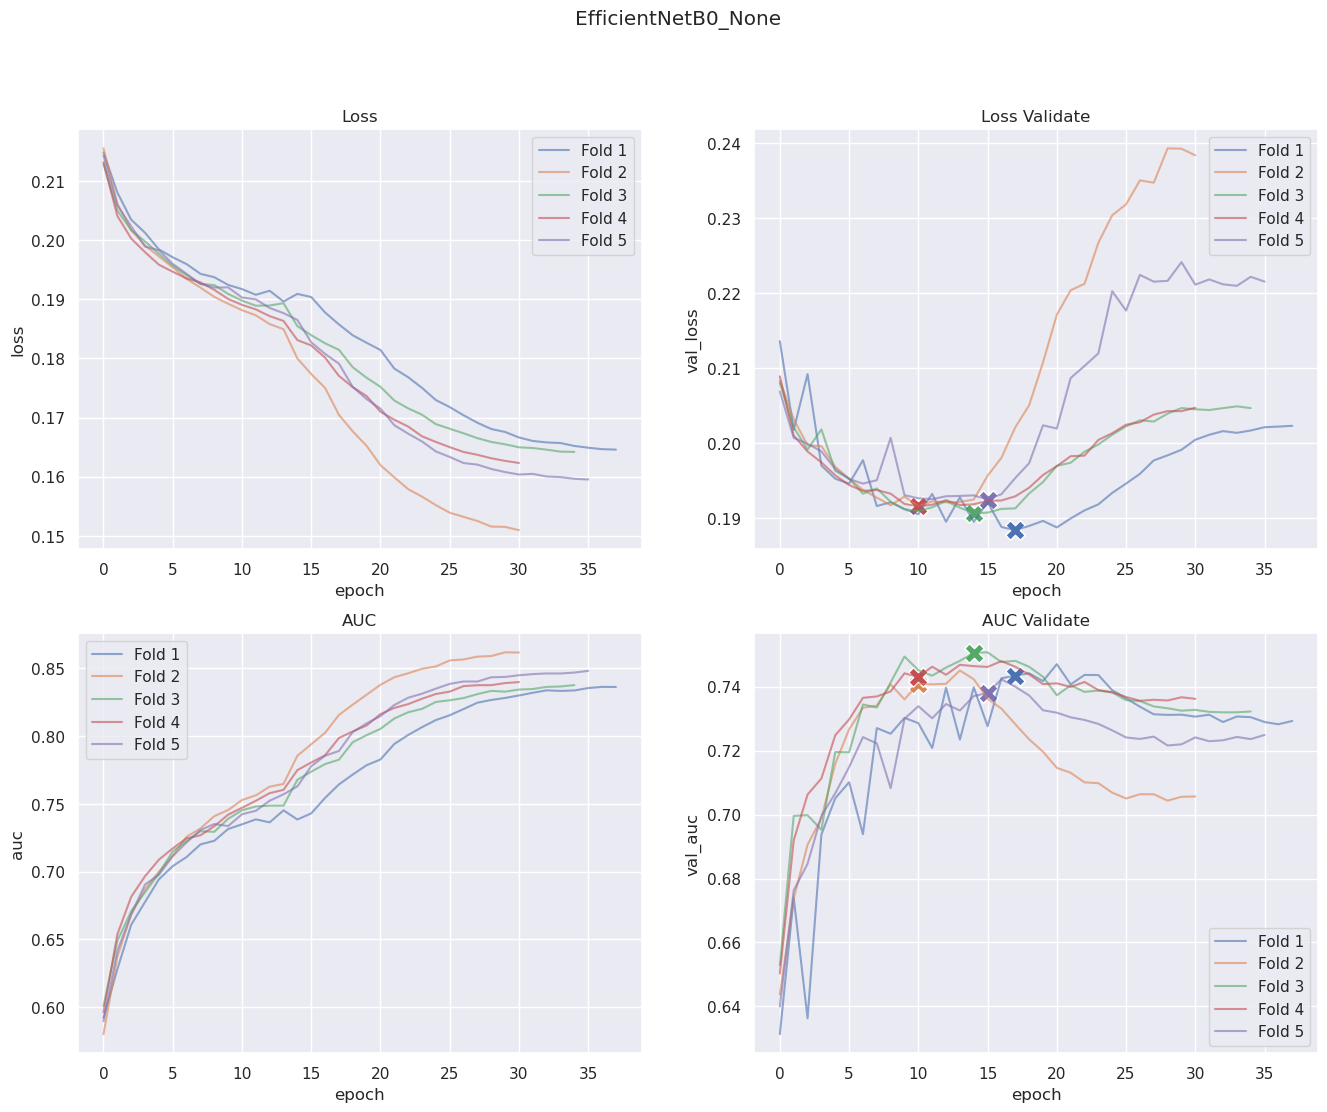

In [11]:
name = "EfficientNetB0_None"
path = "results/history/EfficientNetB0_None"
plot_model_learning(name, path)

### EXP4:EfficientNetB0_Imagenet

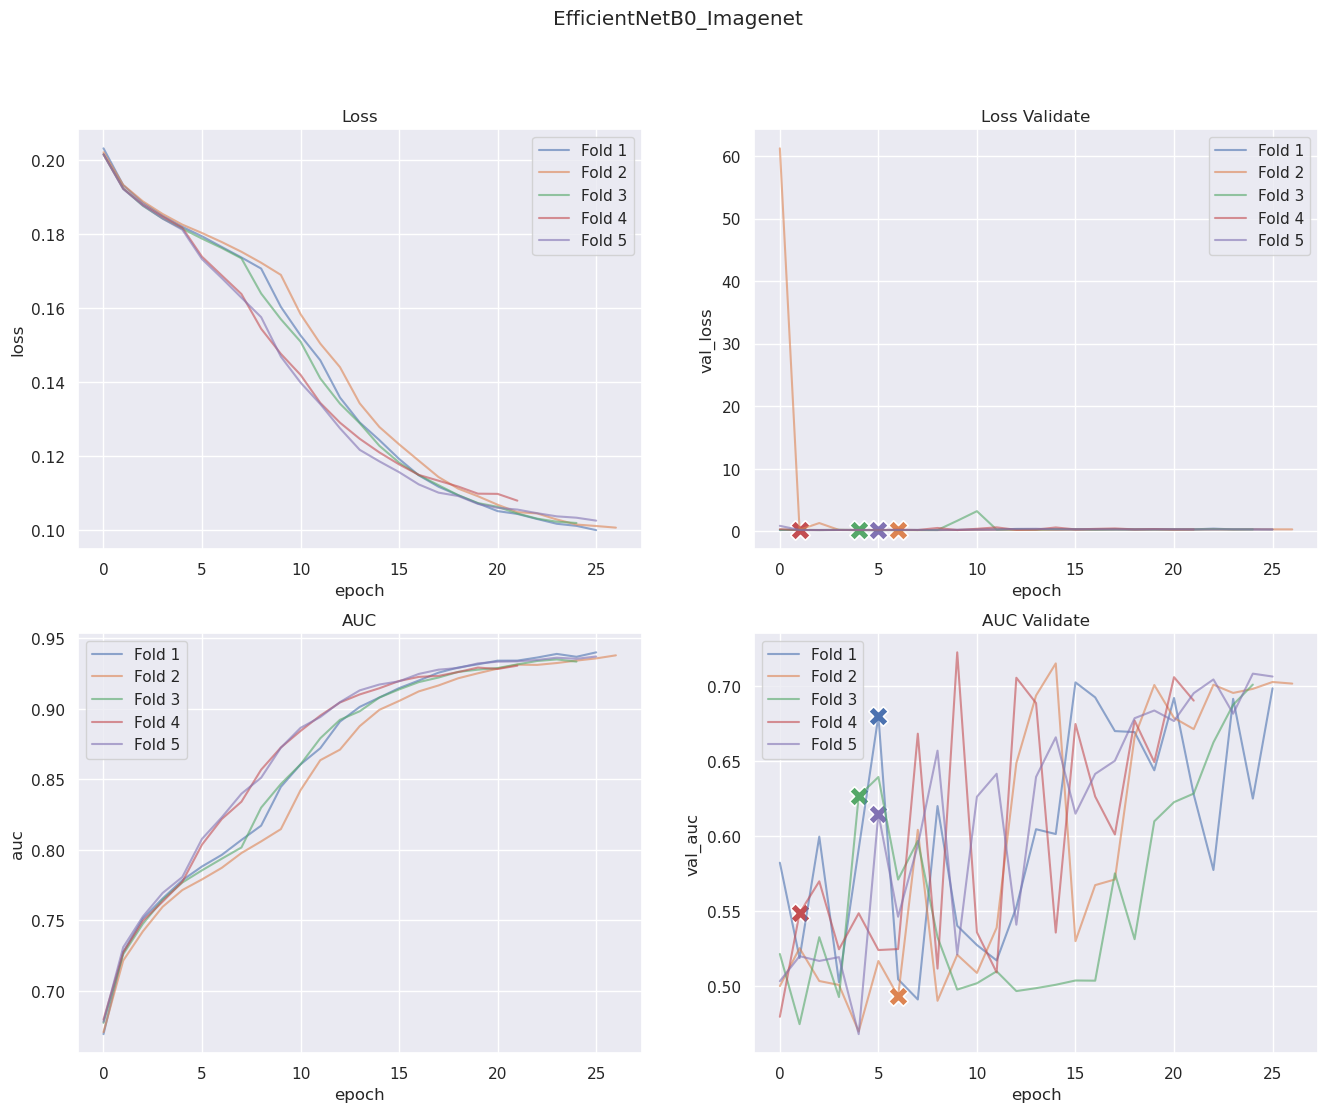

In [12]:
name = "EfficientNetB0_Imagenet"
path = "results/history/EfficientNetB0_imagenet"
plot_model_learning(name, path)

### EXP5:ResNet_None

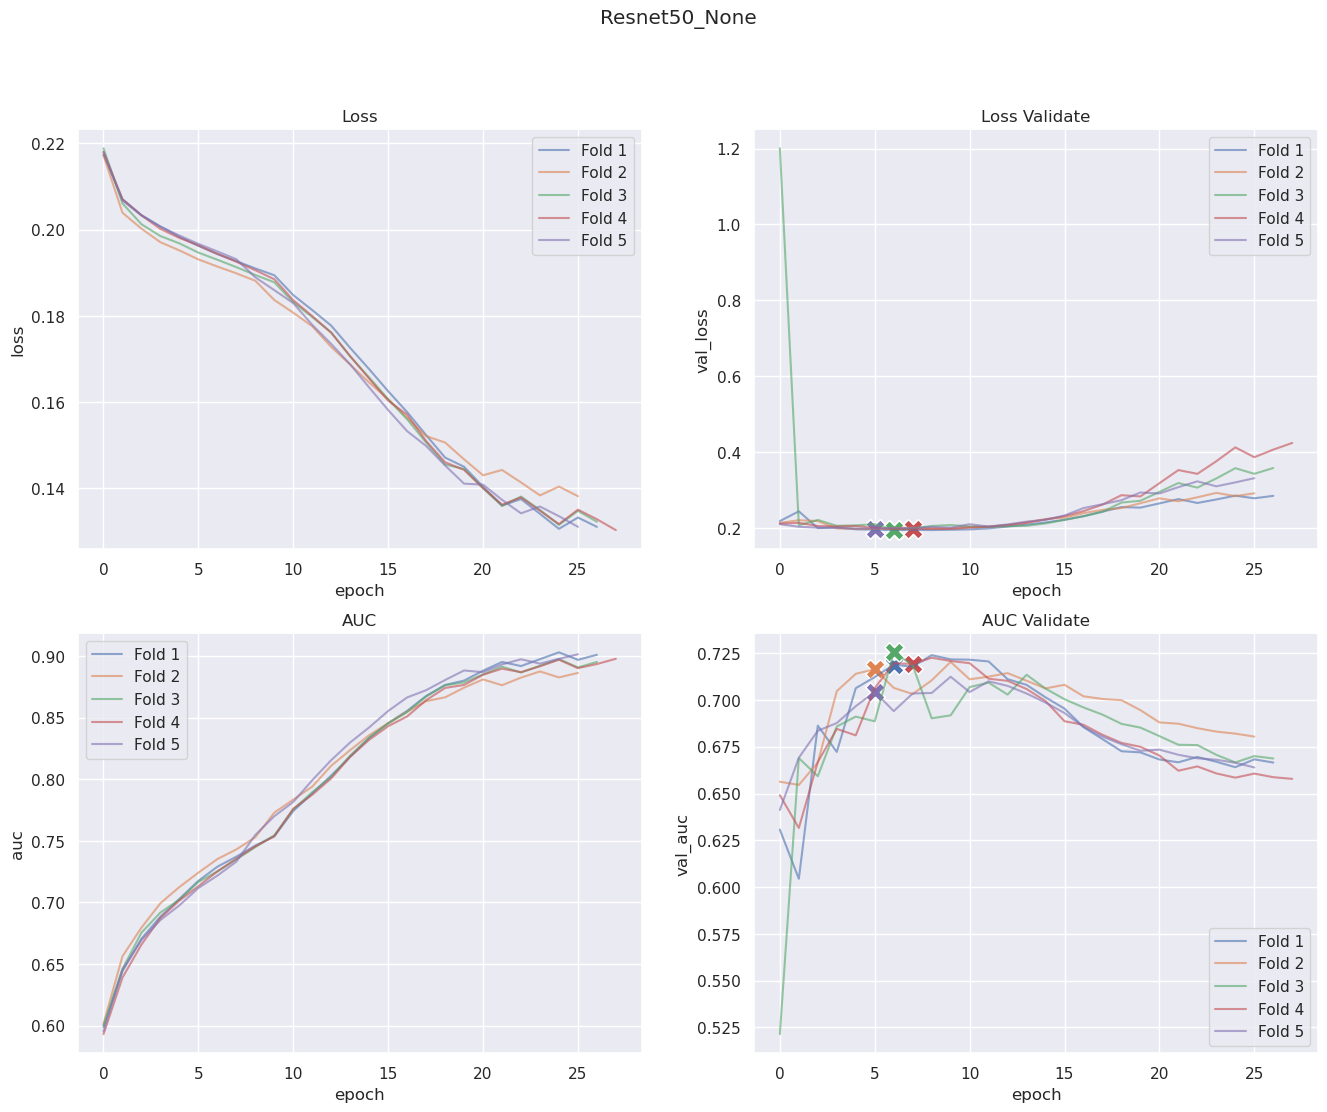

In [13]:
name = "Resnet50_None"
path = "results/history/Resnet50_None"
plot_model_learning(name, path)

### EXP6:ResNet_Imagenet

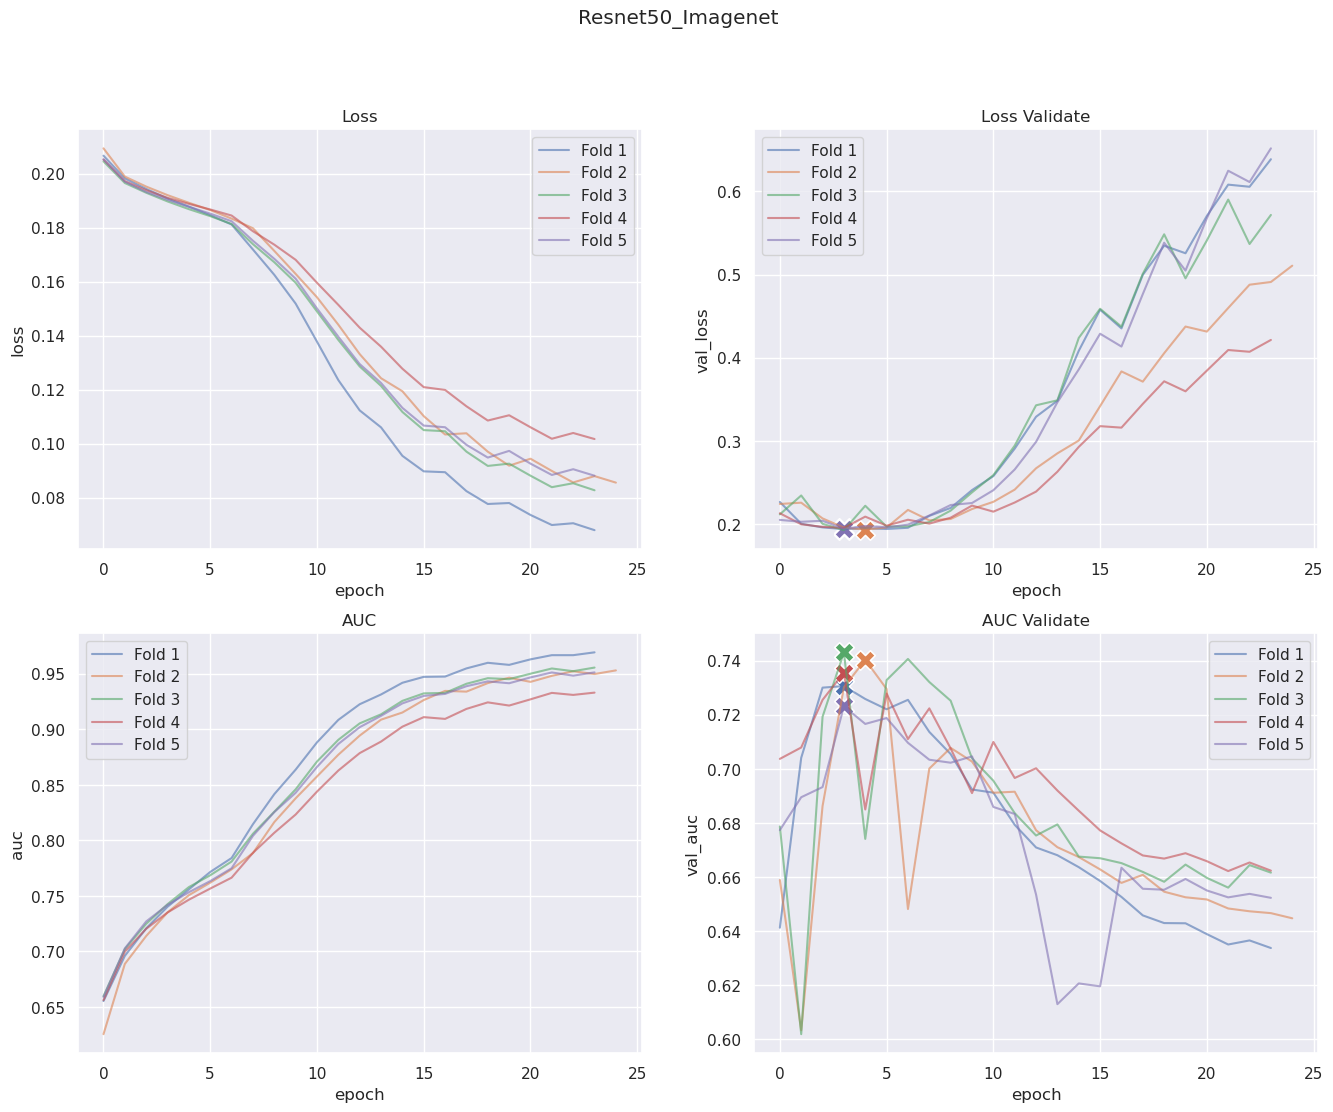

In [14]:
name = "Resnet50_Imagenet"
path = "results/history/Resnet50_imagenet"
plot_model_learning(name, path)

### Dropout

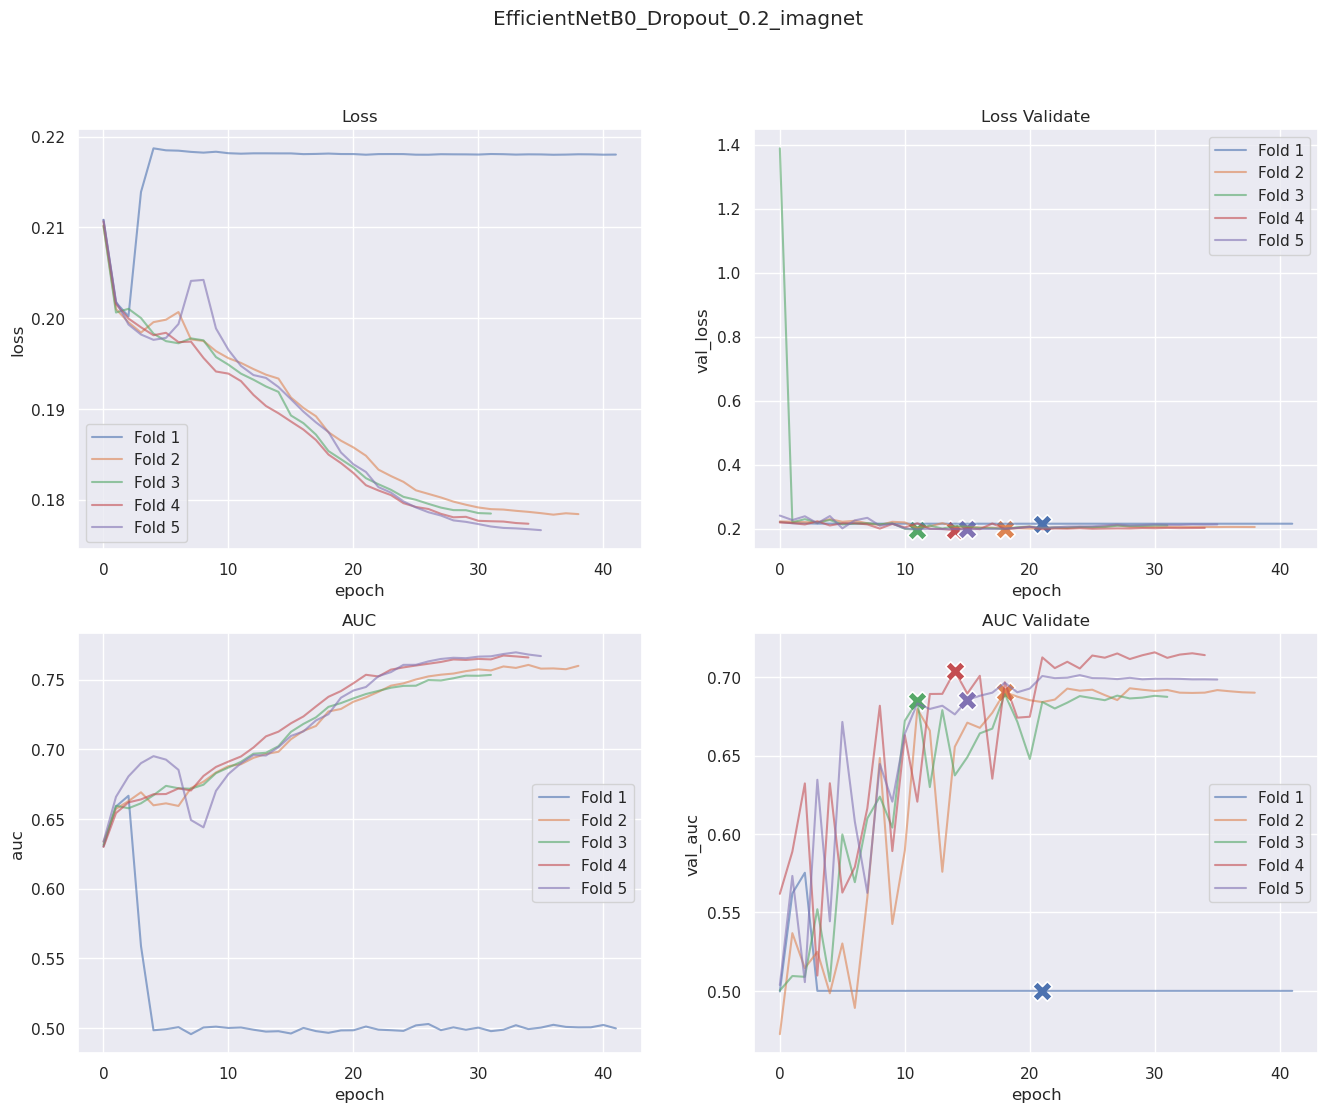

In [9]:
name = "EfficientNetB0_Dropout_0.2_imagnet"
path = "results/history/EfficientNetB0_Dropout_02_imagenet"
plot_model_learning(name, path)

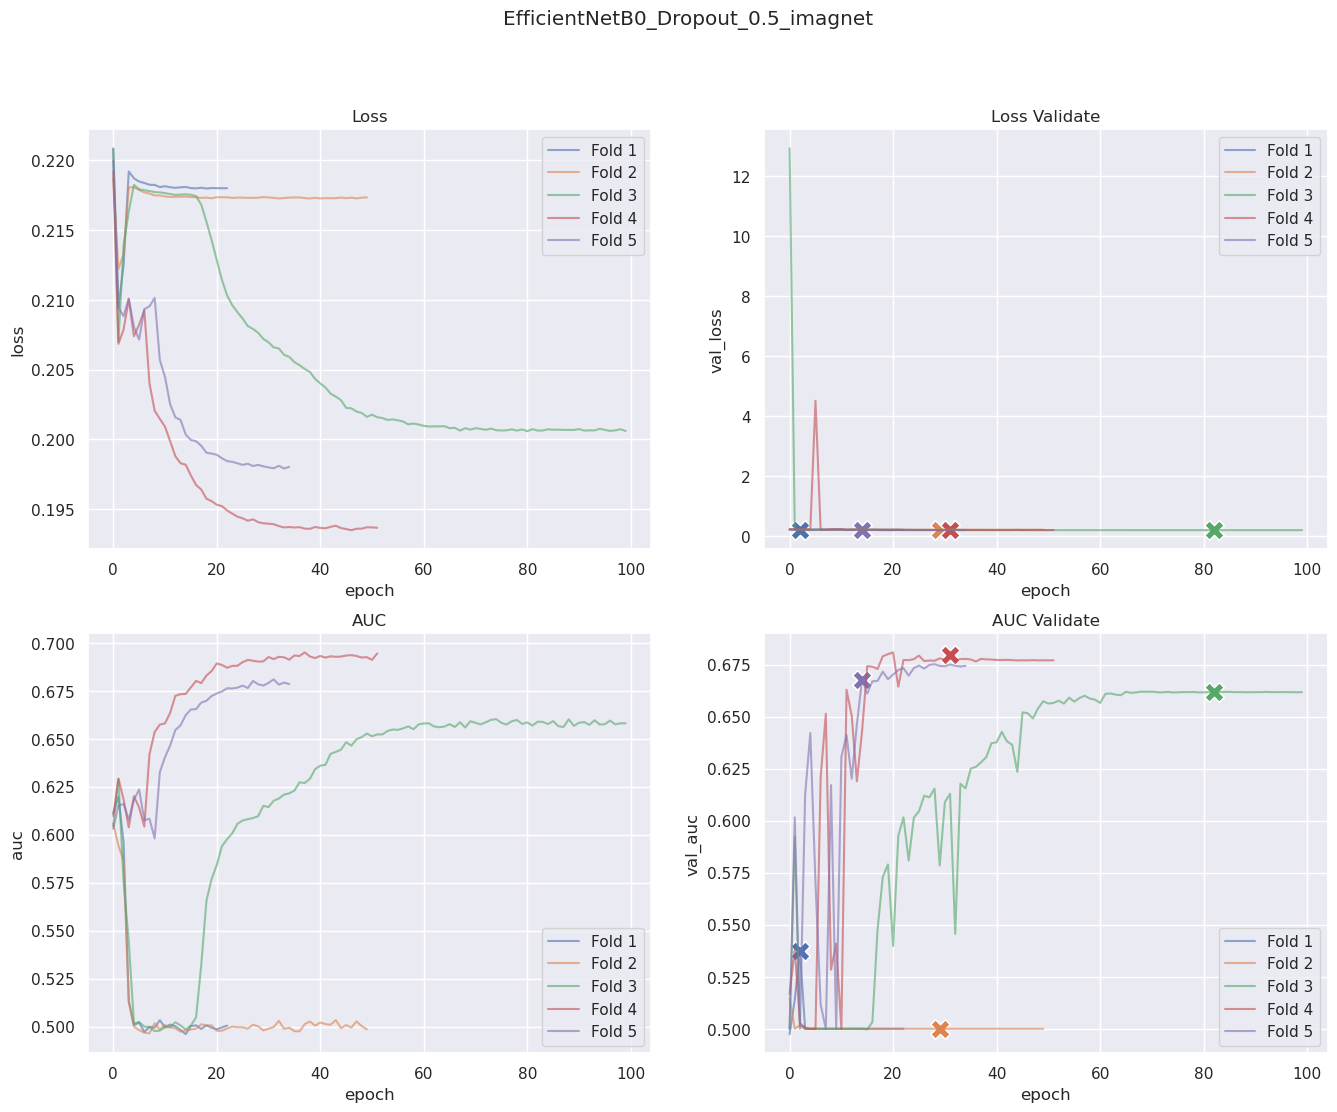

In [11]:
name = "EfficientNetB0_Dropout_0.5_imagnet"
path = "results/history/EfficientNetB0_Dropout_05_imagenet"
plot_model_learning(name, path)

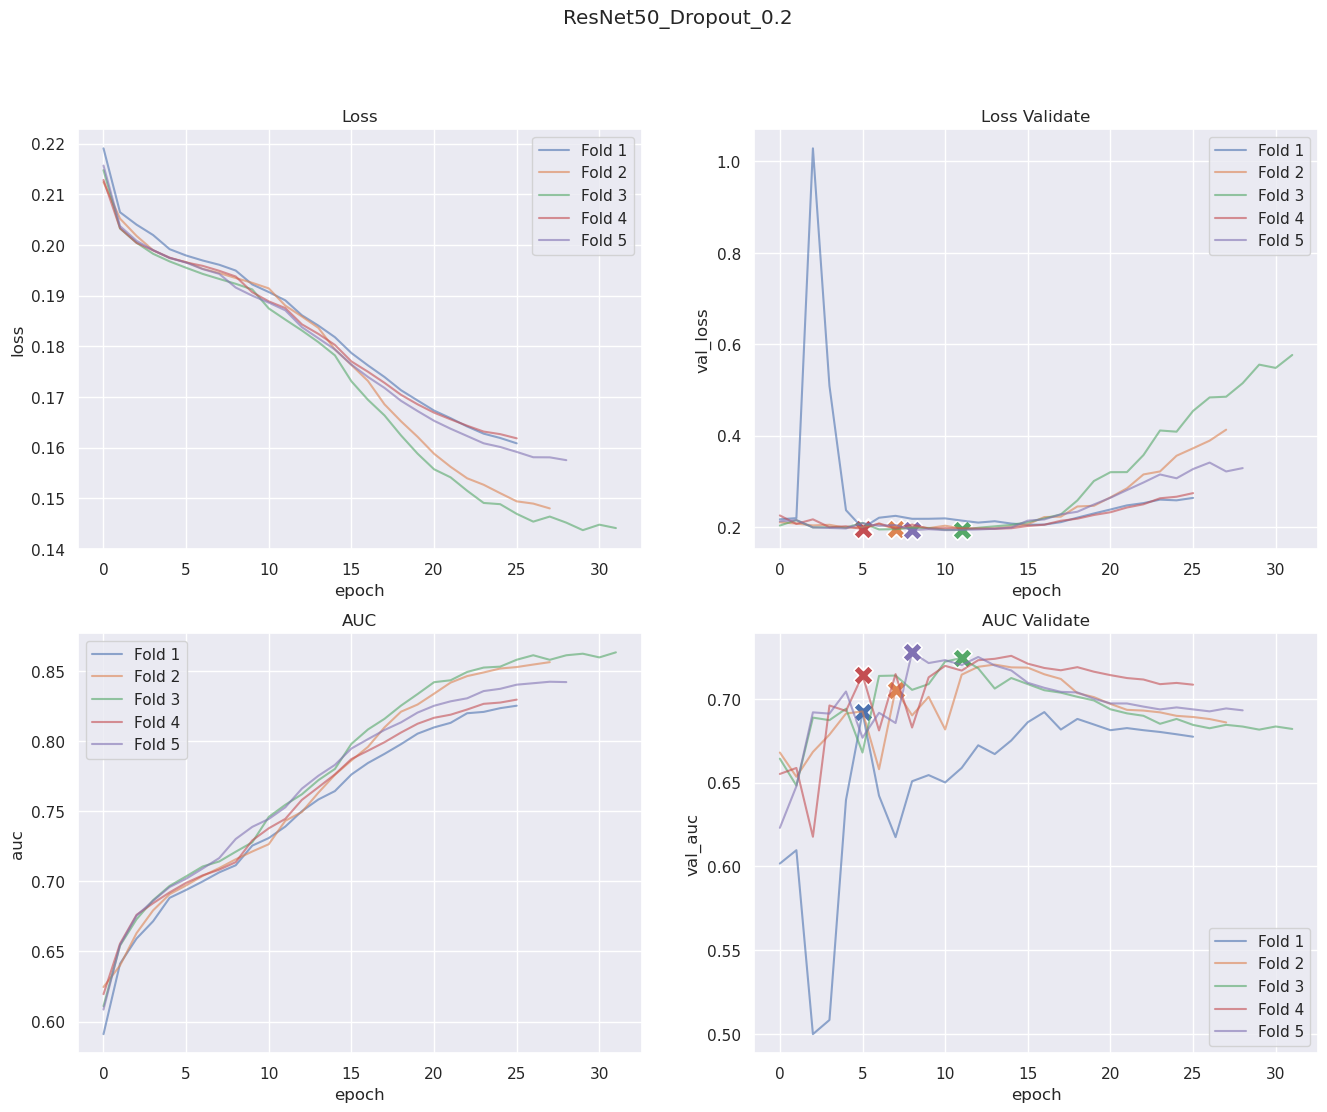

In [13]:
name = "ResNet50_Dropout_0.2"
path = "results/history/Resnet50_Dropout_02_imagenet"
plot_model_learning(name, path)